In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url='https://raw.githubusercontent.com/RAGHUKALLI/upgrade/master/Linear%20RegressionCSV.csv'
dataset=pd.read_csv(url,error_bad_lines=False)

In [4]:
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [5]:
dataset.tail()

,price,sqft_living,bedrooms,bathrooms,floors
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0
21612,325000,1020,2,0.75,2.0


In [6]:
dataset.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [7]:
dataset.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [8]:
dataset.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

**Linear Regression Analysis for price and Sqft Living**

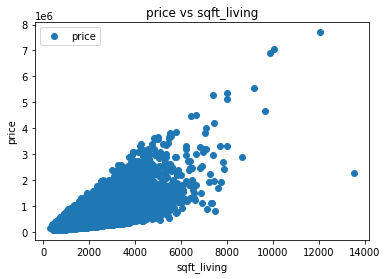

In [9]:
dataset.plot(x='sqft_living', y='price', style='o')  
plt.title('price vs sqft_living')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

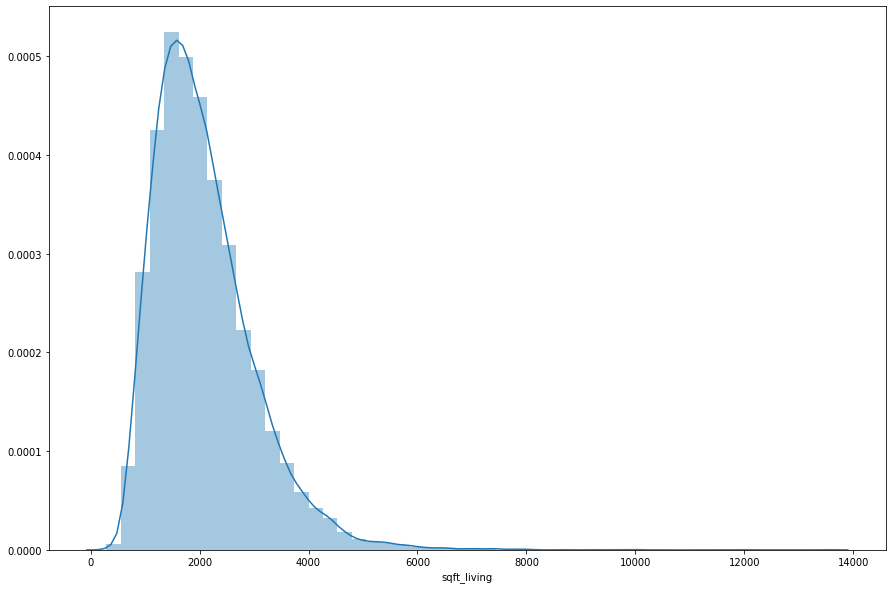

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['sqft_living'])

In [26]:
x = dataset['sqft_living'].values.reshape(-1,1)
y = dataset['price'].values.reshape(-1,1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # splitting data in to test data and train data

In [28]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-48257.06345556]
[[283.96855737]]


In [30]:
y_pred = regressor.predict(x_test)

In [48]:
df =pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.round()

,Actual,Predicted
0,297000,357818.0
1,1578000,1277876.0
2,562100,360658.0
3,631500,272627.0
4,780000,854763.0
...,...,...
4318,844000,829206.0
4319,335500,309543.0
4320,369950,337940.0
4321,300000,221513.0


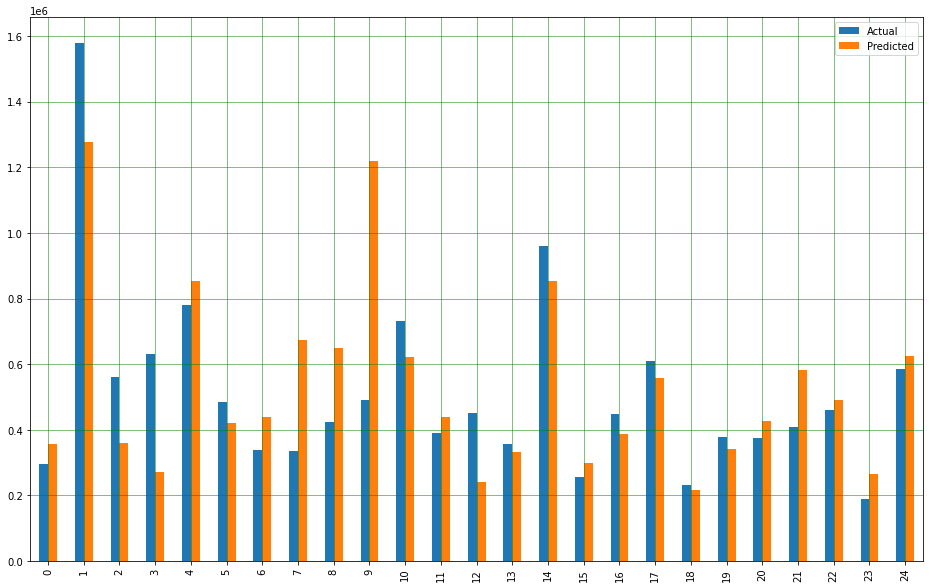

In [49]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

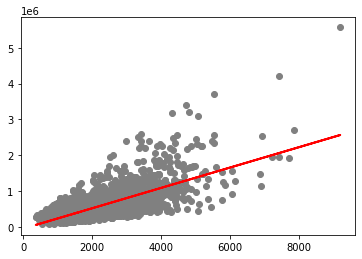

In [50]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 170780.92662084647
Mean Squared Error: 61940787221.49824
Root Mean Squared Error: 248879.06143647005


**Linear Regression Analysis for price and bedrooms**

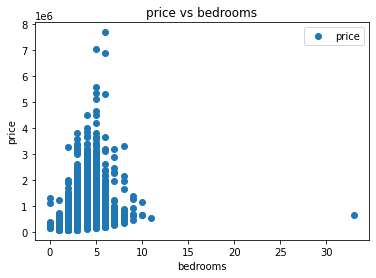

In [57]:
dataset.plot(x='bedrooms', y='price', style='o')  
plt.title('price vs bedrooms')  
plt.xlabel('bedrooms')  
plt.ylabel('price')  
plt.show()

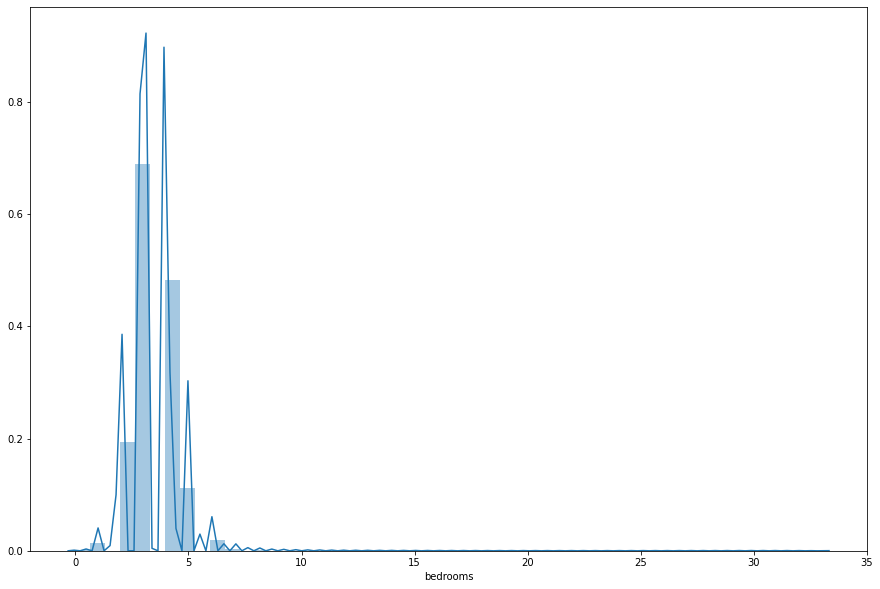

In [53]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['bedrooms'])

In [60]:
x = dataset['bedrooms'].values.reshape(-1,1)
y = dataset['price'].values.reshape(-1,1)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # splitting data in to test data and train data

In [62]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[126751.84604781]
[[123535.45915908]]


In [66]:
y_pred = regressor.predict(x_test)

In [67]:
df =pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.round()

,Actual,Predicted
0,297000,373823.0
1,1578000,620894.0
2,562100,373823.0
3,631500,373823.0
4,780000,620894.0
...,...,...
4318,844000,620894.0
4319,335500,497358.0
4320,369950,497358.0
4321,300000,497358.0


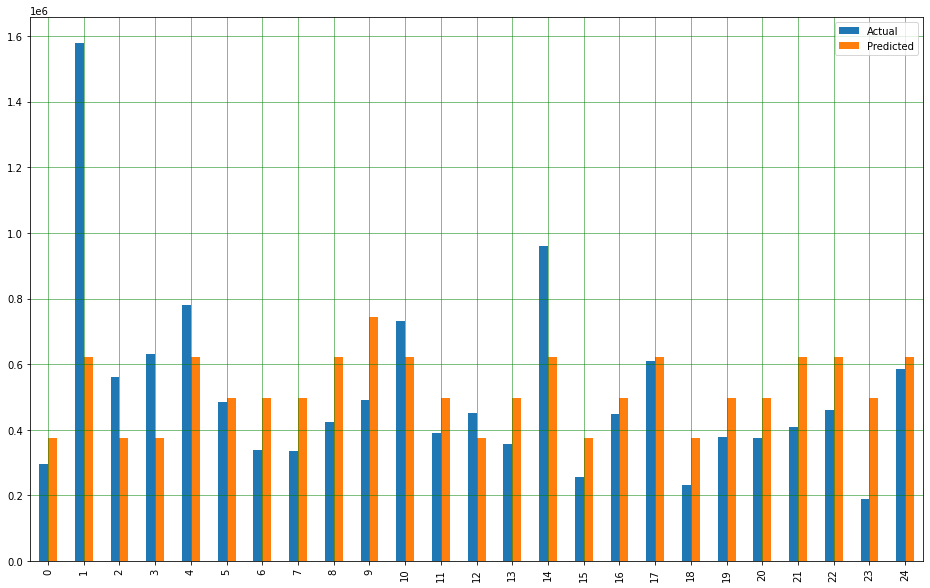

In [68]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

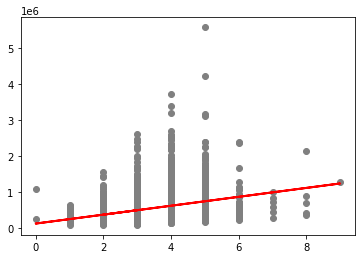

In [69]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

**Linear Regression Analysis for price and bathrooms**

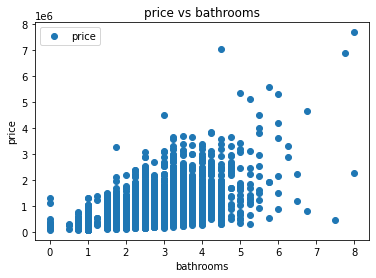

In [ ]:
dataset.plot(x='bathrooms', y='price', style='o')  
plt.title('price vs bathrooms')  
plt.xlabel('bathrooms')  
plt.ylabel('price')  
plt.show()

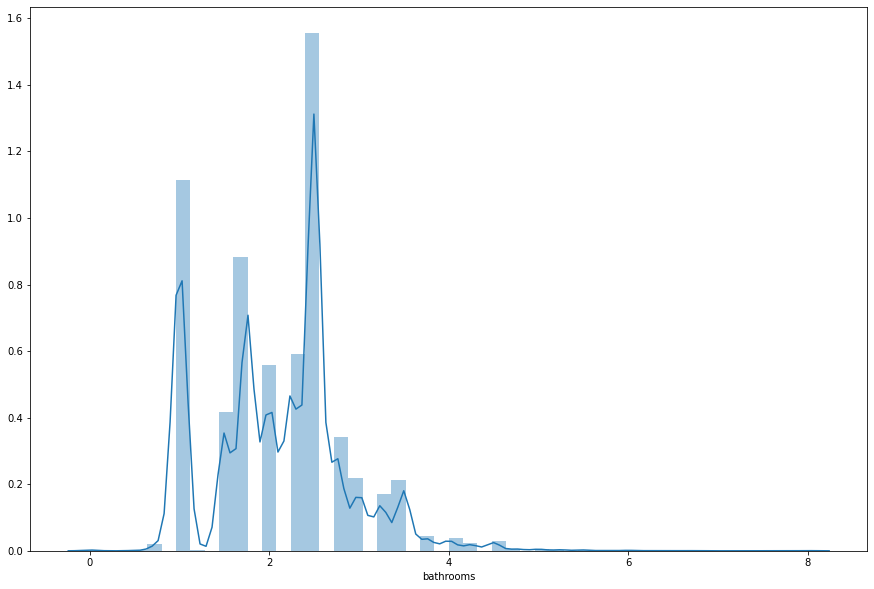

In [72]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['bathrooms'])

In [73]:
x = dataset['bathrooms'].values.reshape(-1,1)
y = dataset['price'].values.reshape(-1,1)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # splitting data in to test data and train data

In [75]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[6313.08347882]
[[253263.96384055]]


In [78]:
y_pred = regressor.predict(x_test)

In [79]:
df =pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.round()

,Actual,Predicted
0,297000,386209.0
1,1578000,829421.0
2,562100,196261.0
3,631500,259577.0
4,780000,639473.0
...,...,...
4318,844000,829421.0
4319,335500,449525.0
4320,369950,639473.0
4321,300000,259577.0


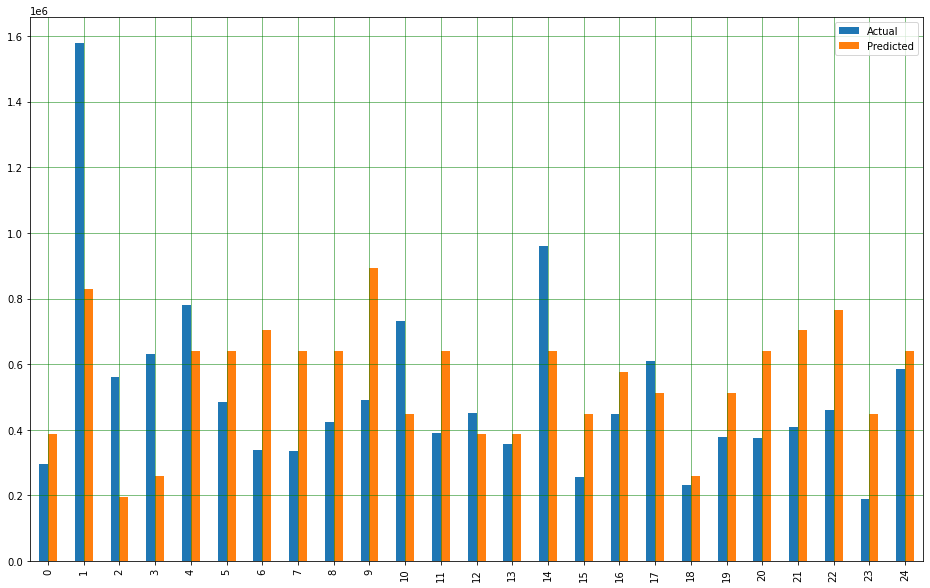

In [80]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

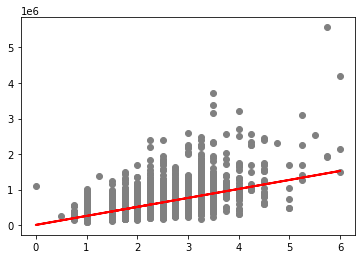

In [81]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

**Linear Regression Analysis for price and floors**

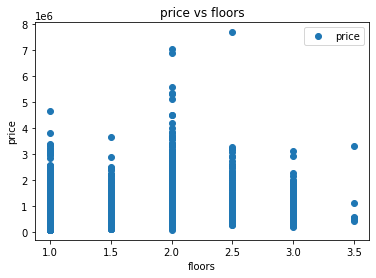

In [ ]:
dataset.plot(x='floors', y='price', style='o')  
plt.title('price vs floors')  
plt.xlabel('floors')  
plt.ylabel('price')  
plt.show()

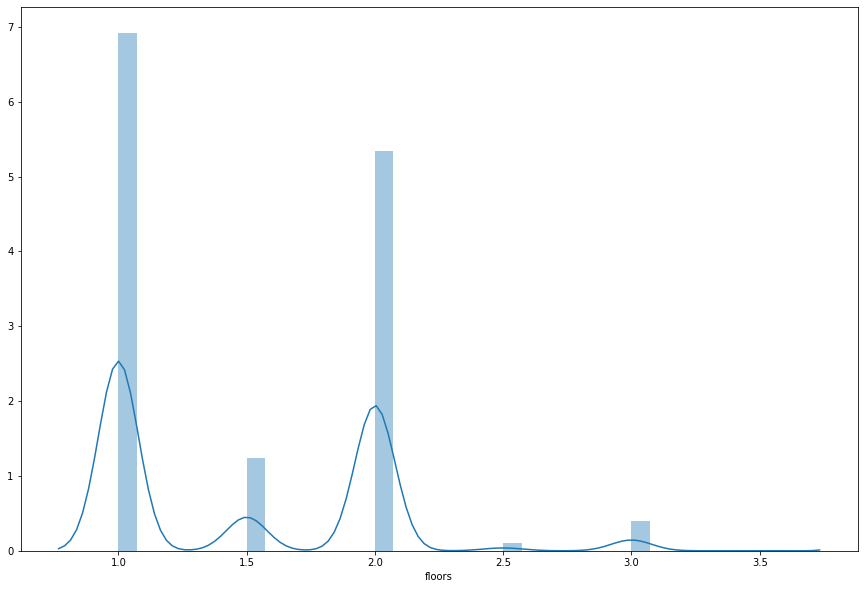

In [82]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['floors'])

In [84]:
x = dataset['floors'].values.reshape(-1,1)
y = dataset['price'].values.reshape(-1,1)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # splitting data in to test data and train data

In [86]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[280691.95125499]
[[174964.59154108]]


In [88]:
y_pred = regressor.predict(x_test)

In [89]:
df =pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.round()

,Actual,Predicted
0,297000,805586.0
1,1578000,630621.0
2,562100,455657.0
3,631500,455657.0
4,780000,630621.0
...,...,...
4318,844000,630621.0
4319,335500,455657.0
4320,369950,630621.0
4321,300000,543139.0


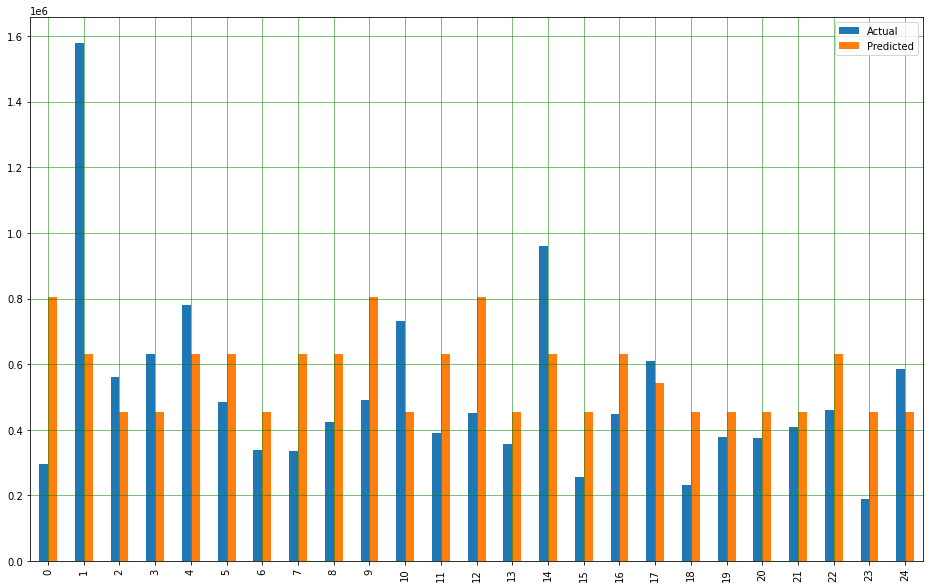

In [90]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

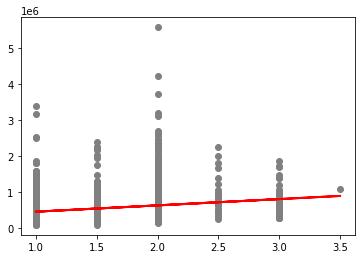

In [91]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

**Multilpe Regression Analysis**

In [92]:
X = dataset[['sqft_living', 'bedrooms', 'bathrooms', 'floors']].values
y = dataset['price'].values

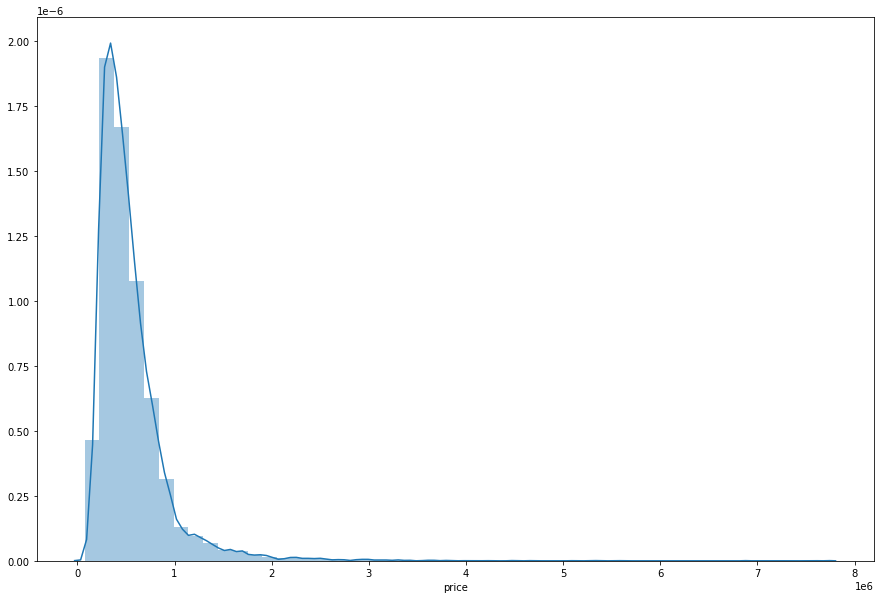

In [93]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['price'])

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # splitting data in to test data and train data

In [96]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
y_pred = regressor.predict(x_test)

In [102]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

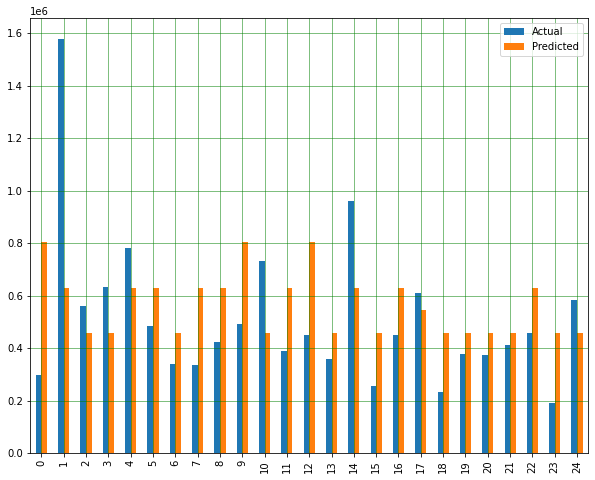

In [103]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 218948.42871092746
Mean Squared Error: 110704251553.8731
Root Mean Squared Error: 332722.48429265054
